C:\Users\pawel\AppData\Local\Temp\ipykernel_20756\1154643962.py:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  osie.scatter(self.domain, self.image, s = 5, c= self.kolor)


5
10
15
20
25
30
35
40
45
50
55
60
65
70


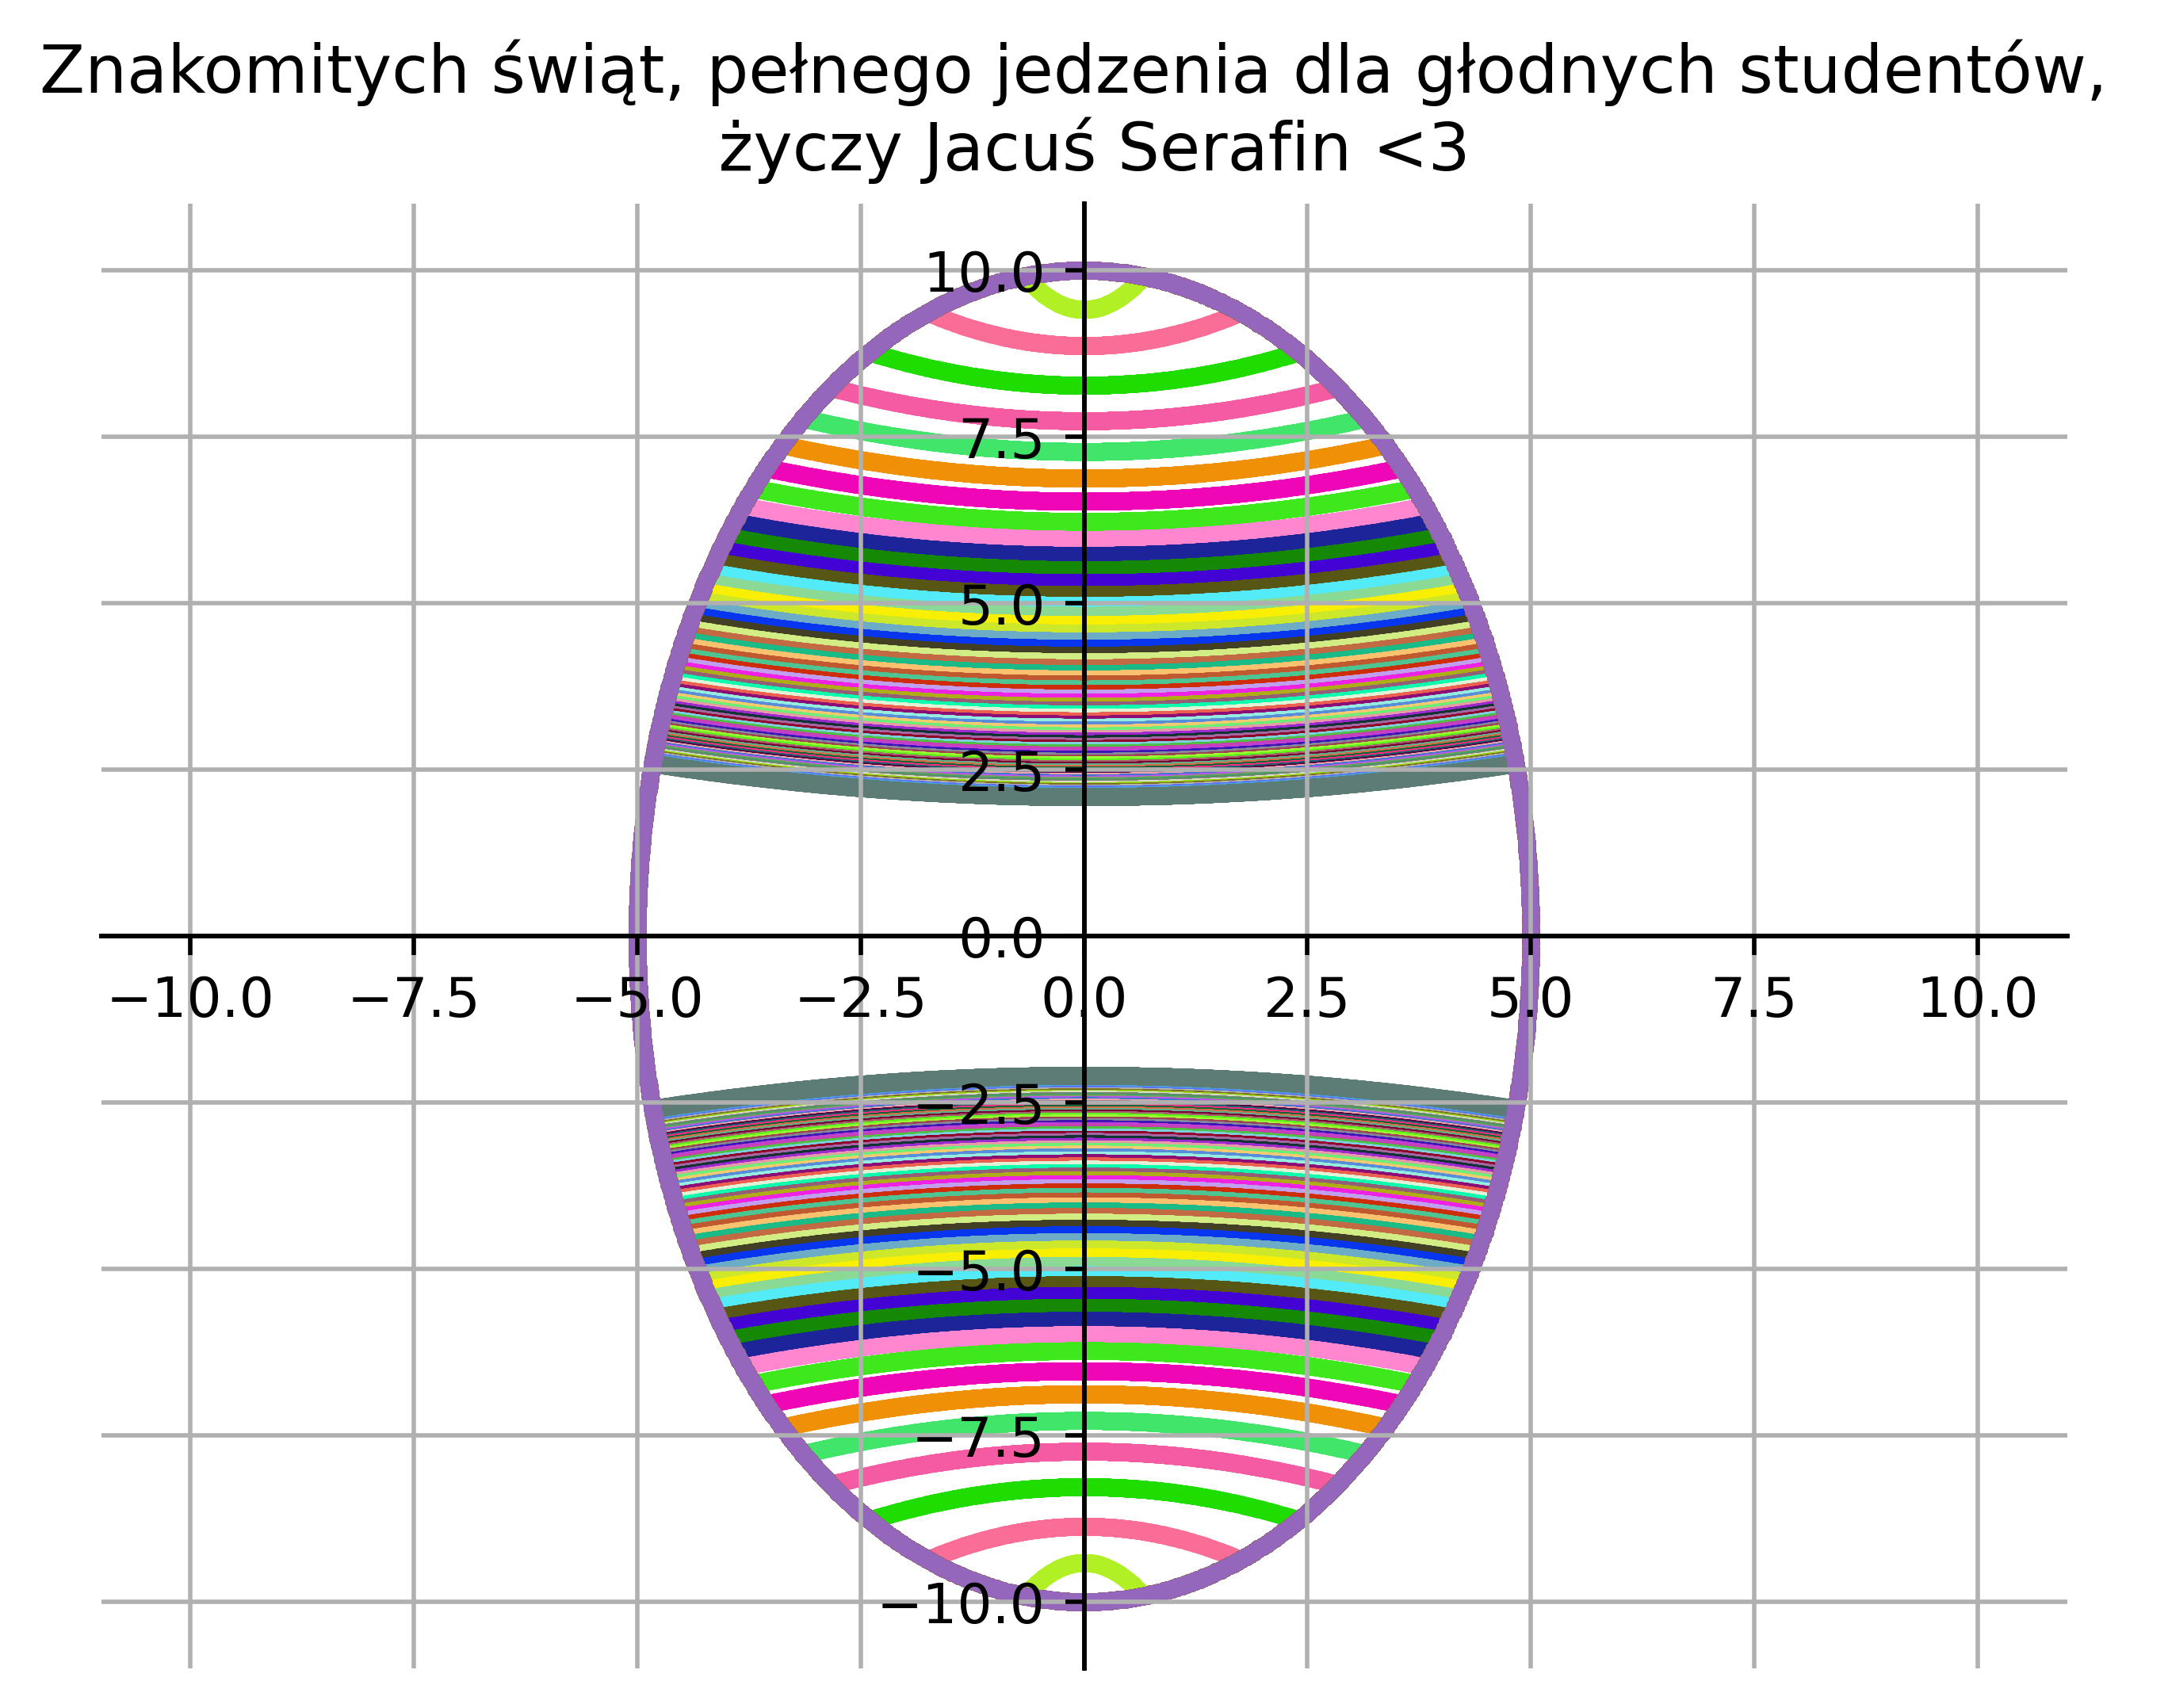

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib as path
import shutil

a = 10
b = a/2



class Parabola():


    def __init__(self, n:int, kolor:tuple[float], orient:int = 1) -> None:

        self.lewykoniec = (-b*n+3)/(n+2)
        self.prawykoniec = (-1)* self.lewykoniec

        self.t = np.arccos(self.lewykoniec/b)

        self.górnykoniec = orient * a*np.sin(self.t)
        

        #Wyznaczanie współczynników paraboli: y = A(n)*x^2 + C(n).
        self.Cn = self.górnykoniec - 0.5 * orient

        if self.lewykoniec != 0:
            self.An = (self.górnykoniec - self.Cn)/(self.lewykoniec*self.lewykoniec)

        self.kalkulator = lambda x: self.An* x**2 + self.Cn
        self.PoliczWartości()

        self.kolor = kolor



    def PoliczWartości(self):
        self.domain = np.arange(self.lewykoniec, self.prawykoniec, 0.01)
        self.image = self.kalkulator(self.domain)


    def WyświetlParabolę(self, osie: plt.axes):
        osie.scatter(self.domain, self.image, s = 5, c= self.kolor)
        

t = np.arange(-5, 5, 0.01)

x = b*np.cos(t)
y = a * np.sin(t)


okienko = plt.figure(dpi  = 125)
osie = okienko.add_subplot()

osie.set_xlim(-a-1, a+1)
osie.set_ylim(-a-1, a+1)

osie.spines[:].set_position(('data',0))
osie.grid(True)

docelowy = path.Path(r"C:\Users\pawel\OneDrive\Życie\Studia\Matematyka i Analiza Danych, PWr\Semestr 2\Programowanie\Laboratorium\Listy problemów\Lista 2")/"Klatki"
osie.scatter(x,y, s = 5)
kolorki = []
end =  50
osie.set_title("Znakomitych świąt, pełnego jedzenia dla głodnych studentów, \n życzy Jacuś Serafin <3")

for n in range(1 , end , 1):
    kolor = np.random.uniform(0,1, 3)

    kolorki.append(kolor)


    Parabola(n, kolor, 1).WyświetlParabolę(osie)
    Parabola(n, kolor, -1).WyświetlParabolę(osie)
    osie.scatter(x,y, s = 5)

    okienko.savefig(fname = docelowy/f"Klatka numer {n}.png", format = 'png')
    if n% 5 == 0:
        print(n)



i = end

for n in range(end-1, 0, -1):
    Obraz_kopia = docelowy/f"Klatka numer {n}.png"
    
    NowaKlatka  = docelowy/f"Klatka numer {i}.png"

    shutil.copy(Obraz_kopia, NowaKlatka)
    
    i+=1


